In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 
df1 = df.copy()

In [5]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               235 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.495061359


In [10]:
df.describe()


,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.665162,0.483114,0.480803,0.491175,0.497621,0.486474,0.487677,0.495528,0.500208,0.597641,0.596350,0.629378,0.631539
std,0.121370,0.330431,0.309092,0.309513,0.313410,0.323293,0.313013,0.289928,0.281715,0.233643,0.231938,0.125231,0.125076
min,0.498054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.289441,0.276276
25%,0.559713,0.230429,0.259964,0.260347,0.241882,0.230937,0.235895,0.238941,0.241563,0.542195,0.544728,0.573323,0.585761
50%,0.647710,0.527654,0.529294,0.490035,0.523564,0.479533,0.468671,0.487335,0.474176,0.619409,0.620888,0.656040,0.651264
75%,0.709368,0.793270,0.755931,0.752712,0.773642,0.767178,0.763092,0.733808,0.725216,0.753554,0.763877,0.711400,0.709998
max,0.973361,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981908,0.977471,0.954957,0.932568,0.841299,0.851915


In [11]:
des, res = researchpy.ttest(df['Excess Return % 3-mo (Treasury)'], df1['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0  Excess Return % 3-mo (Treasury)   59.0  0.483114  0.330431  0.043018   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  337.0  0.489107  0.253874  0.013829   
 
    95% Conf.  Interval  
 0   0.397003  0.569225  
 1   0.462612  0.518146  
 2   0.461904  0.516310  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 3-mo (Treasury) - ...   -0.0073
 1                              Degrees of freedom =   335.0000
 2                                               t =    -0.1994
 3                           Two side test p value =     0.8421
 4                          Difference < 0 p value =     0.4211
 5                          Difference > 0 p value =     0.5789
 6                                       Cohen's d =    -0.0286
 7                                       Hedge's g =    -0.0285
 8           

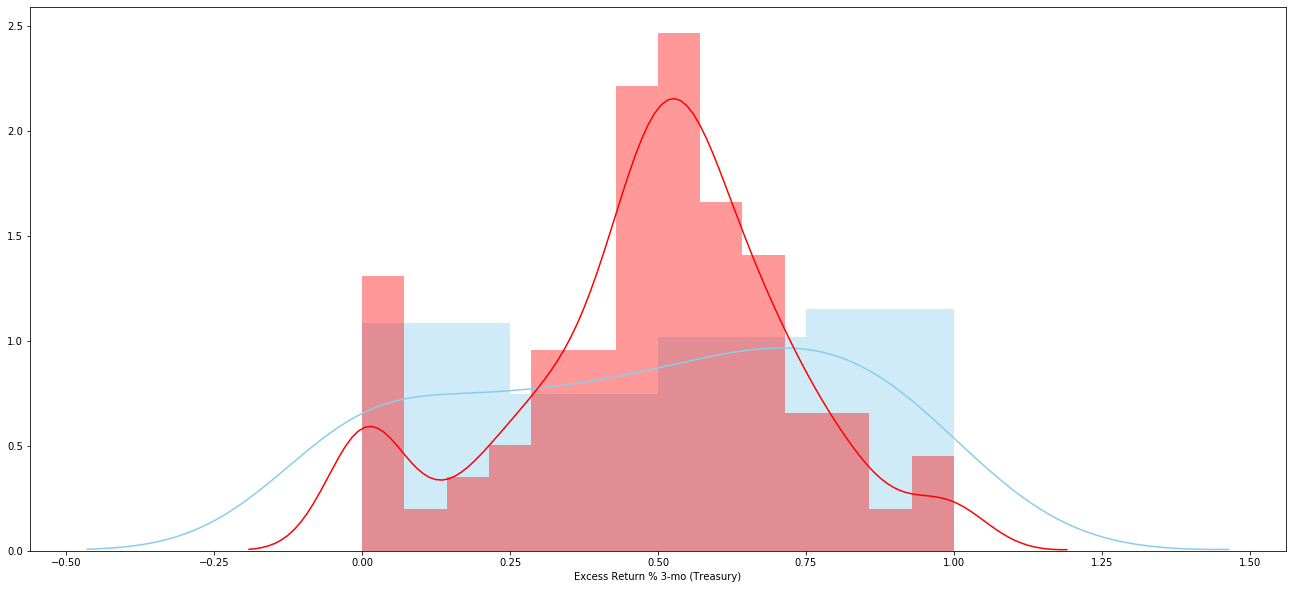

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 3-mo (Treasury)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1['Excess Return % 3-mo (Treasury)'], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['Excess Return % 3-mo (Agg)'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0  Excess Return % 3-mo (Agg)   59.0  0.480803  0.309092  0.040240   0.400254   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  337.0  0.488151  0.237294  0.012926   0.462725   
 
    Interval  
 0  0.561353  
 1  0.515654  
 2  0.513578  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 3-mo (Agg) - Exces...   -0.0089
 1                              Degrees of freedom =   335.0000
 2                                               t =    -0.2615
 3                           Two side test p value =     0.7939
 4                          Difference < 0 p value =     0.3969
 5                          Difference > 0 p value =     0.6031
 6                                       Cohen's d =    -0.0375
 7                                       Hedge's g =    -0.0374
 8                               

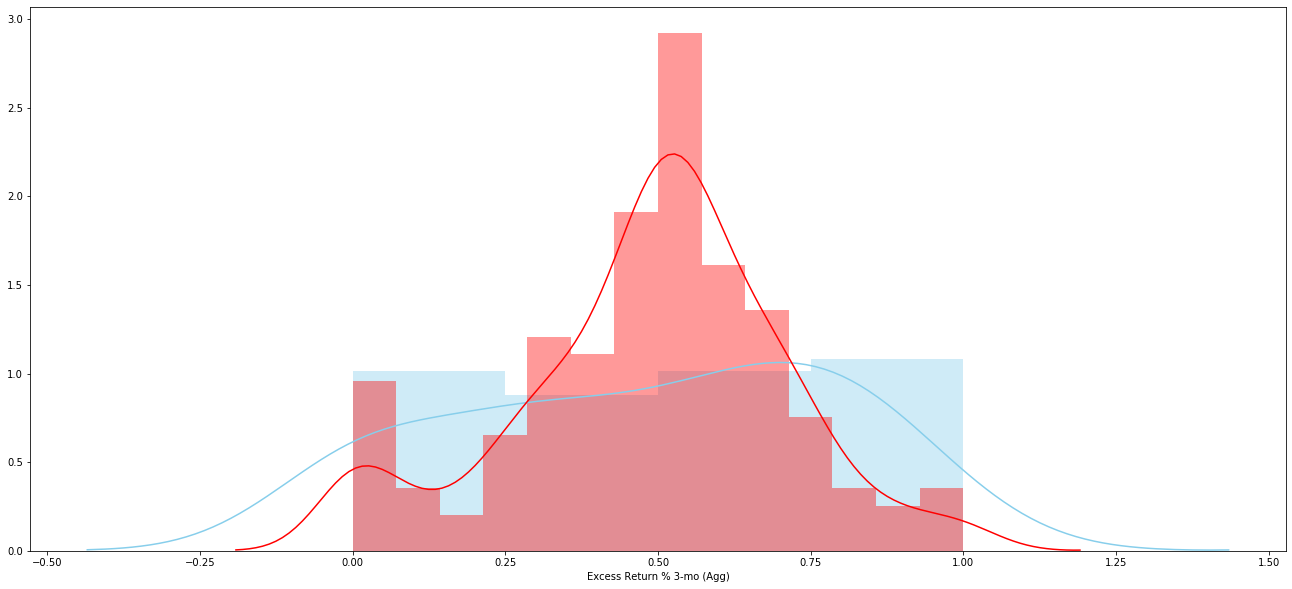

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 3-mo (Agg)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1['Excess Return % 3-mo (Agg)'], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['Excess Return % 6-mo (Treasury)'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0  Excess Return % 6-mo (Treasury)   59.0  0.491175  0.309513  0.040295   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  334.0  0.494469  0.240081  0.013137   
 
    95% Conf.  Interval  
 0   0.410515  0.571834  
 1   0.468691  0.521659  
 2   0.468627  0.520310  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 6-mo (Treasury) - ...   -0.0040
 1                              Degrees of freedom =   332.0000
 2                                               t =    -0.1160
 3                           Two side test p value =     0.9077
 4                          Difference < 0 p value =     0.4539
 5                          Difference > 0 p value =     0.5461
 6                                       Cohen's d =    -0.0166
 7                                       Hedge's g =    -0.0166
 8           

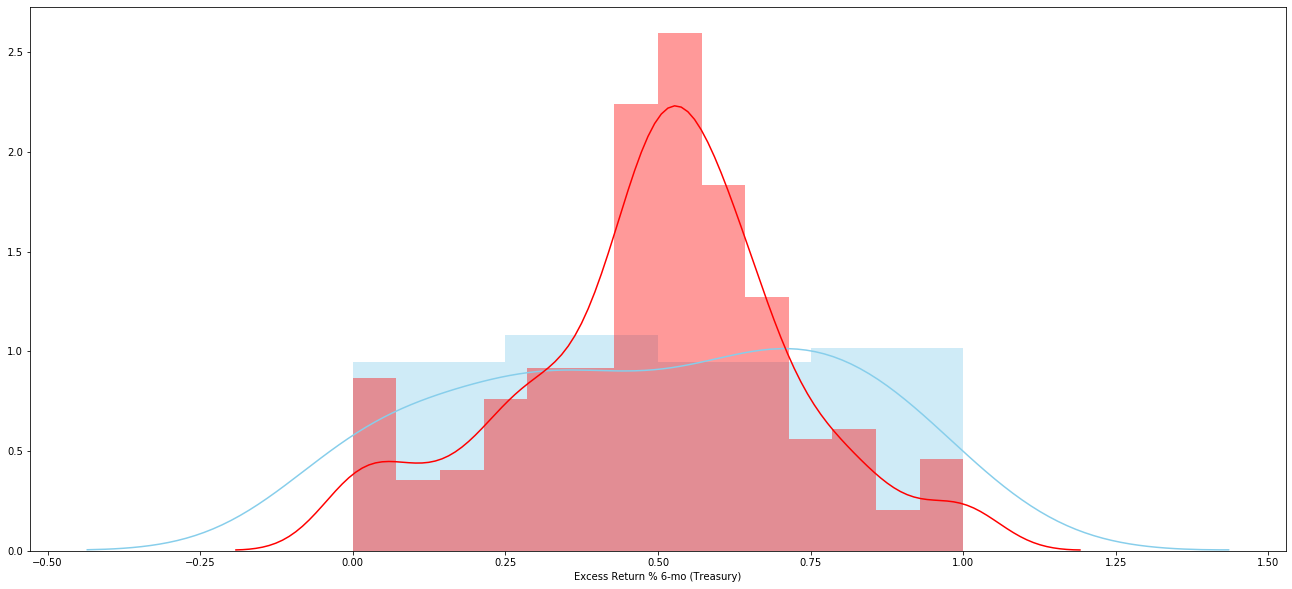

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 6-mo (Treasury)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['Excess Return % 6-mo (Agg)'], df1['Excess Return % 6-mo (Agg)'])

des,res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0  Excess Return % 6-mo (Agg)   59.0  0.497621  0.313410  0.040803   0.415946   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  334.0  0.499318  0.242458  0.013267   0.473221   
 
    Interval  
 0  0.579296  
 1  0.526400  
 2  0.525415  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 6-mo (Agg) - Exces...   -0.0021
 1                              Degrees of freedom =   332.0000
 2                                               t =    -0.0592
 3                           Two side test p value =     0.9529
 4                          Difference < 0 p value =     0.4764
 5                          Difference > 0 p value =     0.5236
 6                                       Cohen's d =    -0.0085
 7                                       Hedge's g =    -0.0085
 8                               

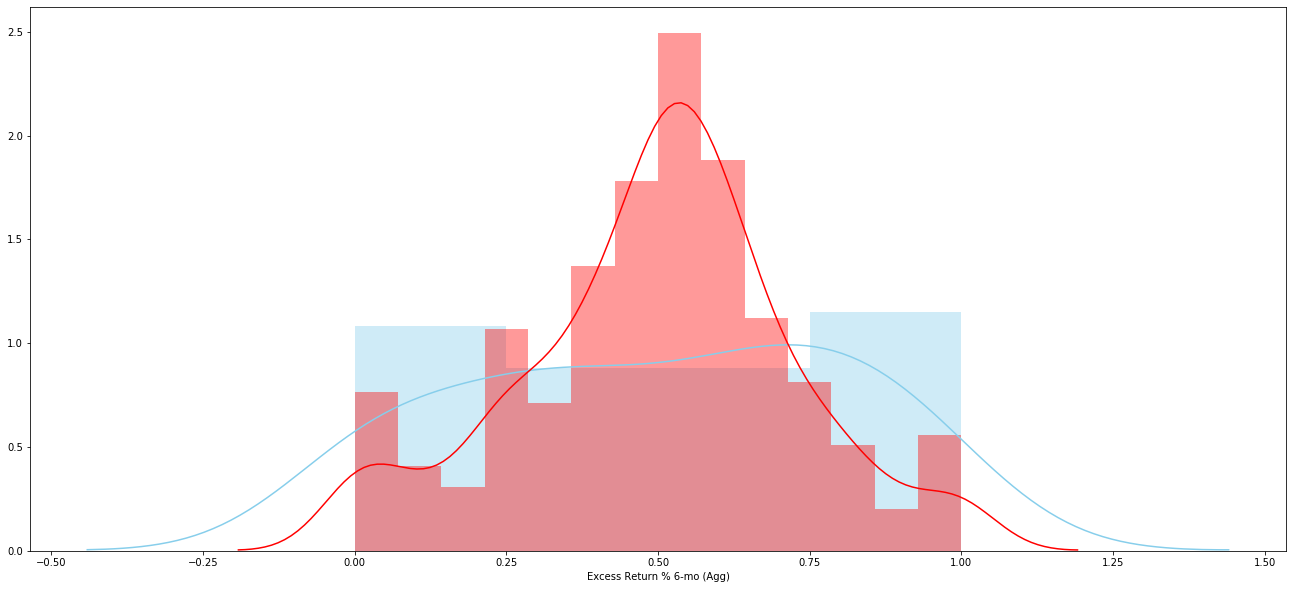

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df['Excess Return % 6-mo (Agg)'], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['Excess Return % 9-mo (Treasury)'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0  Excess Return % 9-mo (Treasury)   59.0  0.486474  0.323293  0.042089   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  331.0  0.503845  0.241025  0.013248   
 
    95% Conf.  Interval  
 0   0.402223  0.570724  
 1   0.481380  0.533846  
 2   0.477784  0.529906  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 9-mo (Treasury) - ...   -0.0211
 1                              Degrees of freedom =   329.0000
 2                                               t =    -0.6101
 3                           Two side test p value =     0.5422
 4                          Difference < 0 p value =     0.2711
 5                          Difference > 0 p value =     0.7289
 6                                       Cohen's d =    -0.0876
 7                                       Hedge's g =    -0.0874
 8           

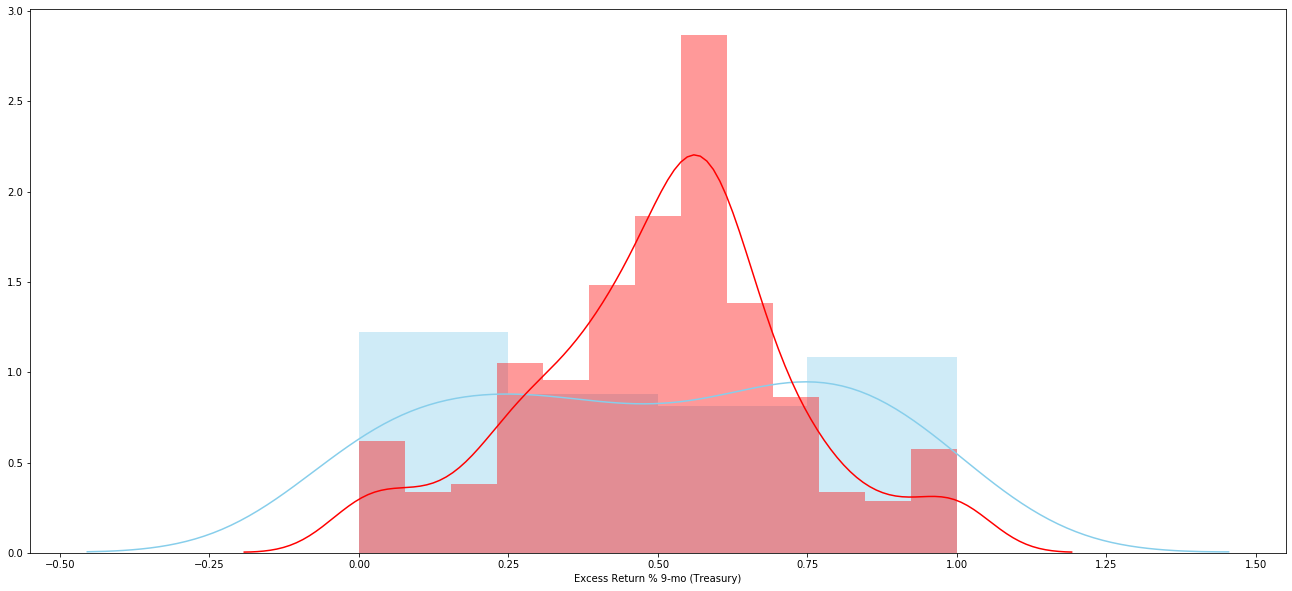

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['Excess Return % 9-mo (Agg)'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0  Excess Return % 9-mo (Agg)   59.0  0.487677  0.313013  0.040751   0.406105   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  331.0  0.502593  0.233642  0.012842   0.477330   
 
    Interval  
 0  0.569248  
 1  0.531276  
 2  0.527855  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 9-mo (Agg) - Exces...   -0.0182
 1                              Degrees of freedom =   329.0000
 2                                               t =    -0.5404
 3                           Two side test p value =     0.5893
 4                          Difference < 0 p value =     0.2947
 5                          Difference > 0 p value =     0.7053
 6                                       Cohen's d =    -0.0776
 7                                       Hedge's g =    -0.0774
 8                               

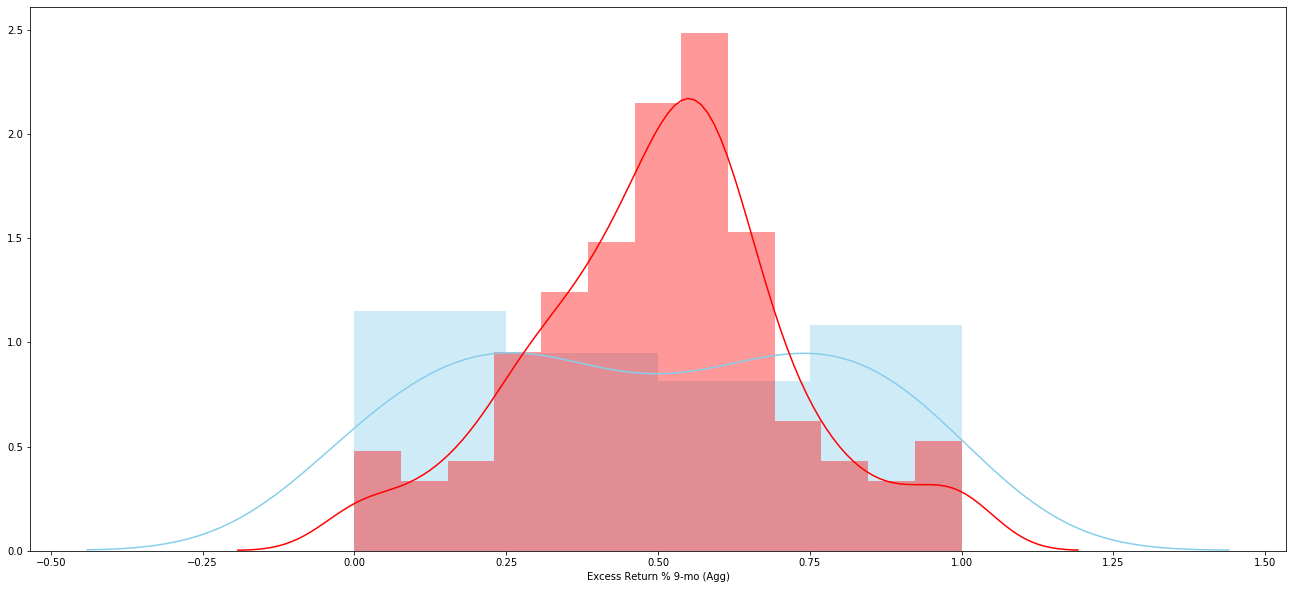

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['Excess Return % 12-mo (Treasury)'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0  Excess Return % 12-mo (Treasury)   59.0  0.495528  0.289928  0.037745   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  328.0  0.496856  0.224187  0.012379   
 
    95% Conf.  Interval  
 0   0.419972  0.571084  
 1   0.472216  0.522078  
 2   0.472504  0.521208  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 12-mo (Treasury) -...   -0.0016
 1                              Degrees of freedom =   326.0000
 2                                               t =    -0.0502
 3                           Two side test p value =     0.9600
 4                          Difference < 0 p value =     0.4800
 5                          Difference > 0 p value =     0.5200
 6                                       Cohen's d =    -0.0072
 7                                       Hedge's g =    -0.0072
 8       

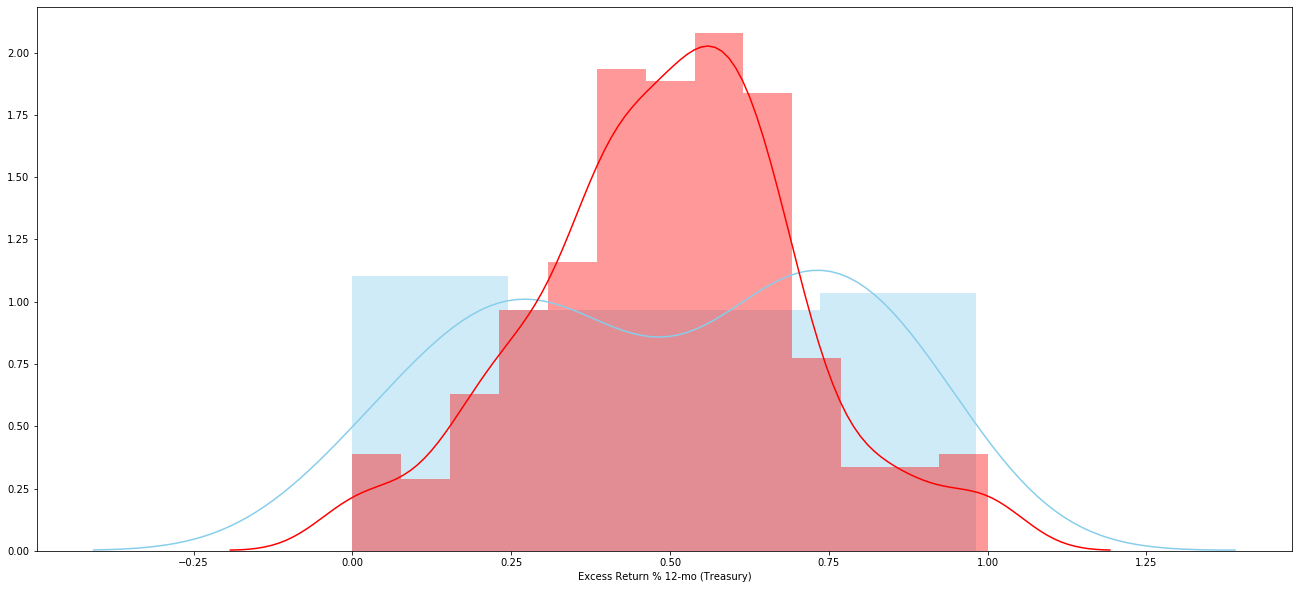

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['Excess Return % 12-mo (Agg)'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0  Excess Return % 12-mo (Agg)   59.0  0.500208  0.281715  0.036676   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  328.0  0.499625  0.217521  0.012011   
 
    95% Conf.  Interval  
 0   0.426793  0.573624  
 1   0.475322  0.523672  
 2   0.475997  0.523252  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 12-mo (Agg) - Exce...    0.0007
 1                              Degrees of freedom =   326.0000
 2                                               t =     0.0227
 3                           Two side test p value =     0.9819
 4                          Difference < 0 p value =     0.5091
 5                          Difference > 0 p value =     0.4909
 6                                       Cohen's d =     0.0033
 7                                       Hedge's g =     0.0033
 8                           

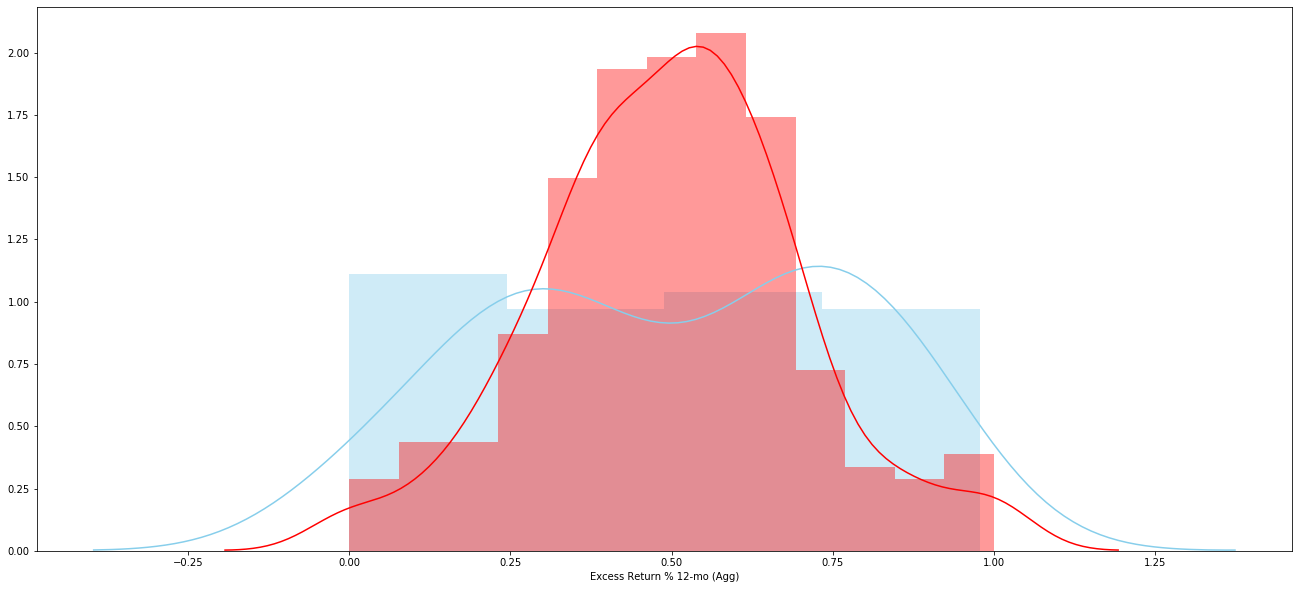

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['Excess Return % 24-mo (Treasury)'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0  Excess Return % 24-mo (Treasury)   59.0  0.597641  0.233643  0.030418   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  316.0  0.524183  0.221706  0.012472   
 
    95% Conf.  Interval  
 0   0.536753  0.658528  
 1   0.480806  0.533832  
 2   0.499644  0.548722  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 24-mo (Treasury) -...    0.0903
 1                              Degrees of freedom =   314.0000
 2                                               t =     2.8539
 3                           Two side test p value =     0.0046
 4                          Difference < 0 p value =     0.9977
 5                          Difference > 0 p value =     0.0023
 6                                       Cohen's d =     0.4120
 7                                       Hedge's g =     0.4110
 8       

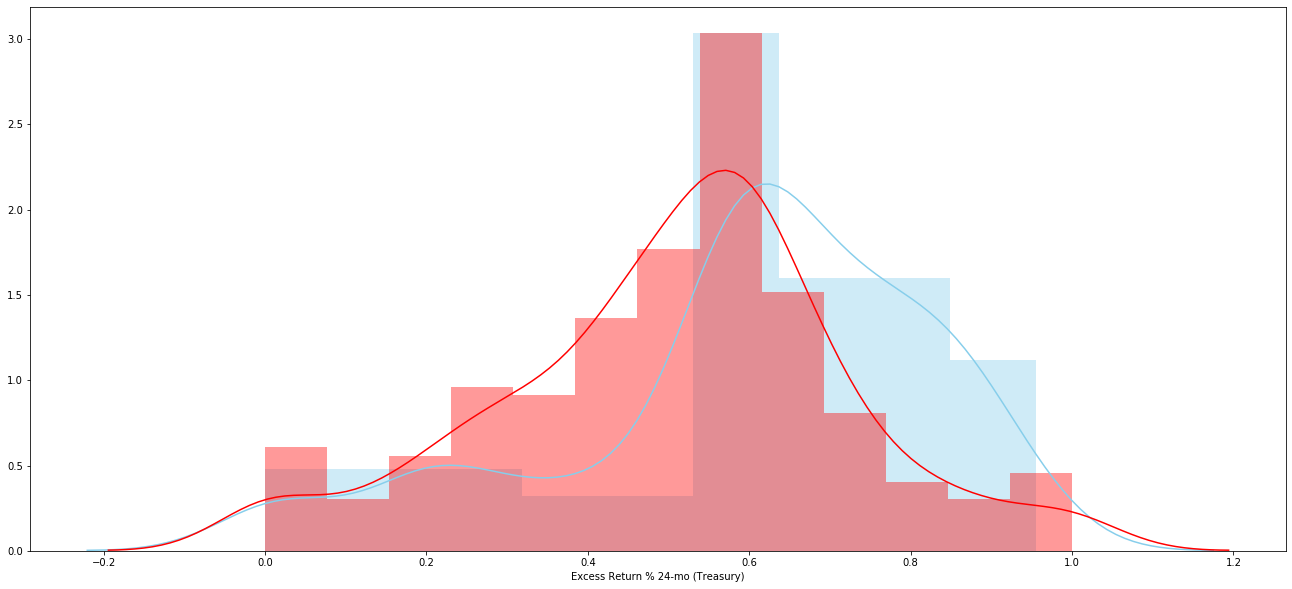

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['Excess Return % 24-mo (Agg)'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0  Excess Return % 24-mo (Agg)   59.0  0.596350  0.231938  0.030196   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  316.0  0.516565  0.224993  0.012657   
 
    95% Conf.  Interval  
 0   0.535907  0.656793  
 1   0.471252  0.525244  
 2   0.491662  0.541467  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 24-mo (Agg) - Exce...    0.0981
 1                              Degrees of freedom =   314.0000
 2                                               t =     3.0602
 3                           Two side test p value =     0.0024
 4                          Difference < 0 p value =     0.9988
 5                          Difference > 0 p value =     0.0012
 6                                       Cohen's d =     0.4418
 7                                       Hedge's g =     0.4407
 8                           

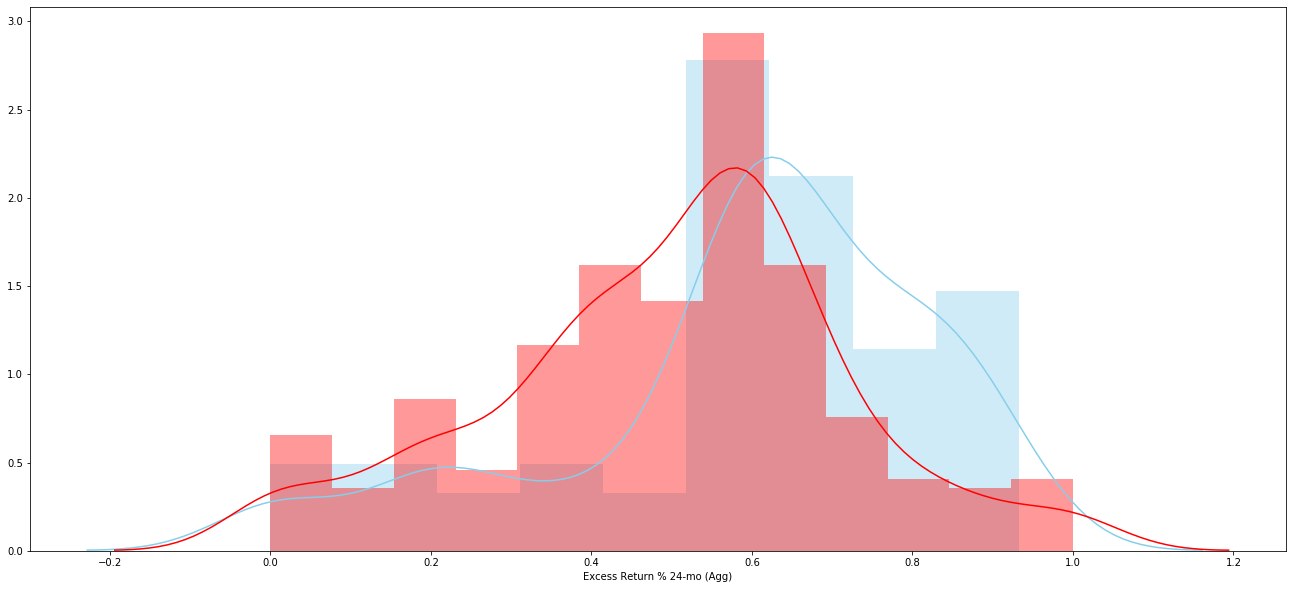

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['Excess Return % 36-mo (Treasury)'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0  Excess Return % 36-mo (Treasury)   59.0  0.629378  0.125231  0.016304   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  304.0  0.519527  0.202268  0.011601   
 
    95% Conf.  Interval  
 0   0.596743  0.662013  
 1   0.466840  0.519306  
 2   0.496698  0.542355  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 36-mo (Treasury) -...    0.1363
 1                              Degrees of freedom =   302.0000
 2                                               t =     4.8139
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.6981
 7                                       Hedge's g =     0.6964
 8       

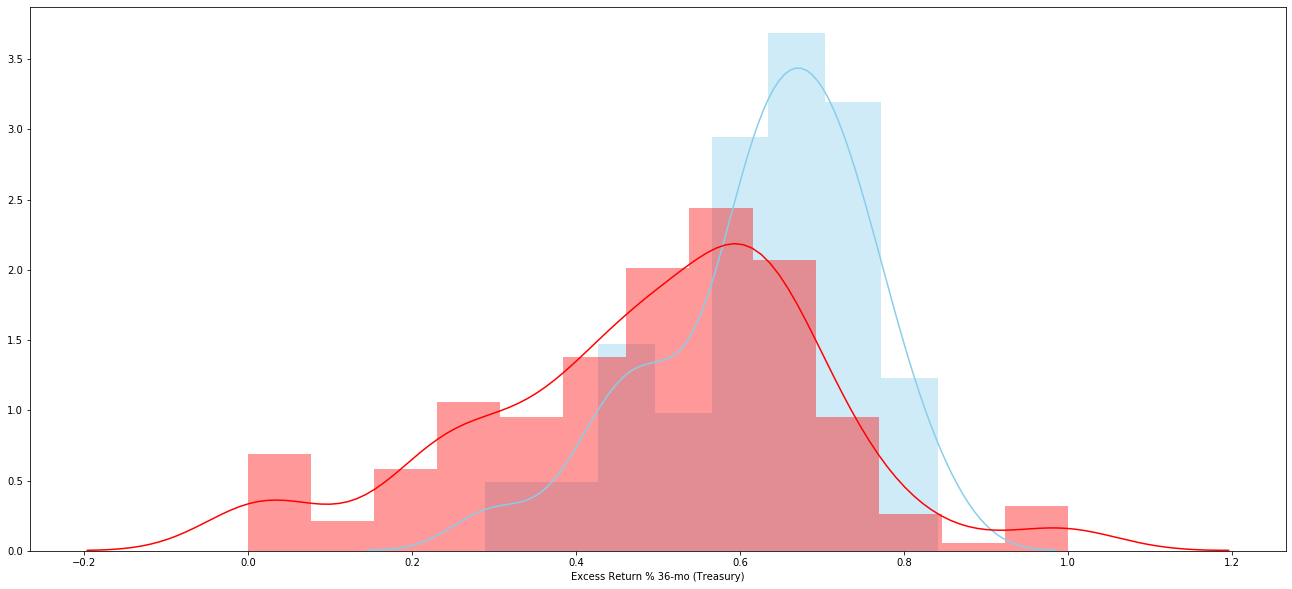

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['Excess Return % 36-mo (Agg)'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0  Excess Return % 36-mo (Agg)   59.0  0.631539  0.125076  0.016284   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  304.0  0.513330  0.210556  0.012076   
 
    95% Conf.  Interval  
 0   0.598943  0.664134  
 1   0.457540  0.512186  
 2   0.489566  0.537093  ,
                                   Independent t-test   results
 0  Difference (Excess Return % 36-mo (Agg) - Exce...    0.1467
 1                              Degrees of freedom =   302.0000
 2                                               t =     4.9894
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.7236
 7                                       Hedge's g =     0.7218
 8                           

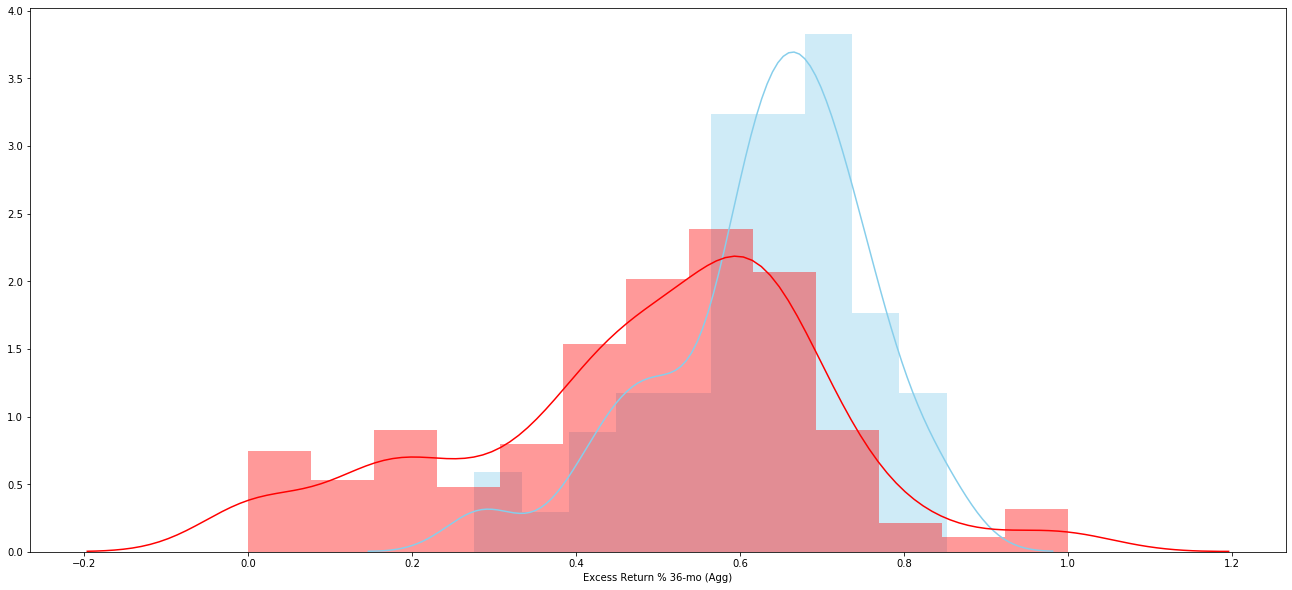

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")